## Loading of Miller ECoG data of faces/houses (+ noise)

includes some visualizations

In [1]:
# @title Data retrieval
import os, requests

fname = 'faceshouses.npz'
url = "https://osf.io/argh7/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [2]:
from matplotlib import rcParams
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [3]:
# @title Data loading
import numpy as np

alldat = np.load(fname, allow_pickle=True)['dat']

# select just one of the recordings here.
dat1 = alldat[1][0]
dat2 = alldat[1][1]

print(dat1.keys())
print(dat2.keys())


dict_keys(['t_off', 'stim_id', 't_on', 'srate', 'V', 'scale_uv', 'locs', 'hemisphere', 'lobe', 'gyrus', 'Brodmann_Area'])
dict_keys(['stim_id', 'stim_cat', 'stim_noise', 't_on', 't_off', 'key_press', 'V', 'categories', 'scale_uv', 'locs', 'hemisphere', 'lobe', 'gyrus', 'Brodmann_Area'])


In [4]:
# Looking inside key_press values
for i in range(len(alldat)):
    print(f"Recording {i}:")
    print(alldat[i][1].get('key_press', 'key_press not found'))


Recording 0:
[  8520   9920  11920  12960  18760  27760  30960  35840  39800  44800
  46760  47760  49800  51760  57240  76000  77000  80160  84040  85880
  90320  95960 115720 116880 122640 123600 134880 136880 140800 147160
 151880 157920 159280 164800 165880 179800 184800 186800 187760 192160
 192880 197800 208120 209000 210040 225840 246880 248800 255160 260880
 261680 264040 265840 269040 270920 285200 293960 294960 298880 301040
 302840 306040 306680 308840 316760 318880 322000 325000 325720 337960
 341800 348880 357000 359880 361000 362920 365760 369080 374960 379880
 383920 387160 388960 390160 403040 413080 414040 422840 424840 427760
 433840 440920 457160 457920 470280 471360 477760 478800 482840 487920
 501960 503040 505920 506920 512400 515720 520800 524040 525880 528920
 532960 543800 566840 568880 573920 582320 583200 584040 585000 595040
 596840 597760 600120 601080 603880 604880 606040 624040 624960 627960
 636040 639320 640680]
Recording 1:
[]
Recording 2:
[]
Recording

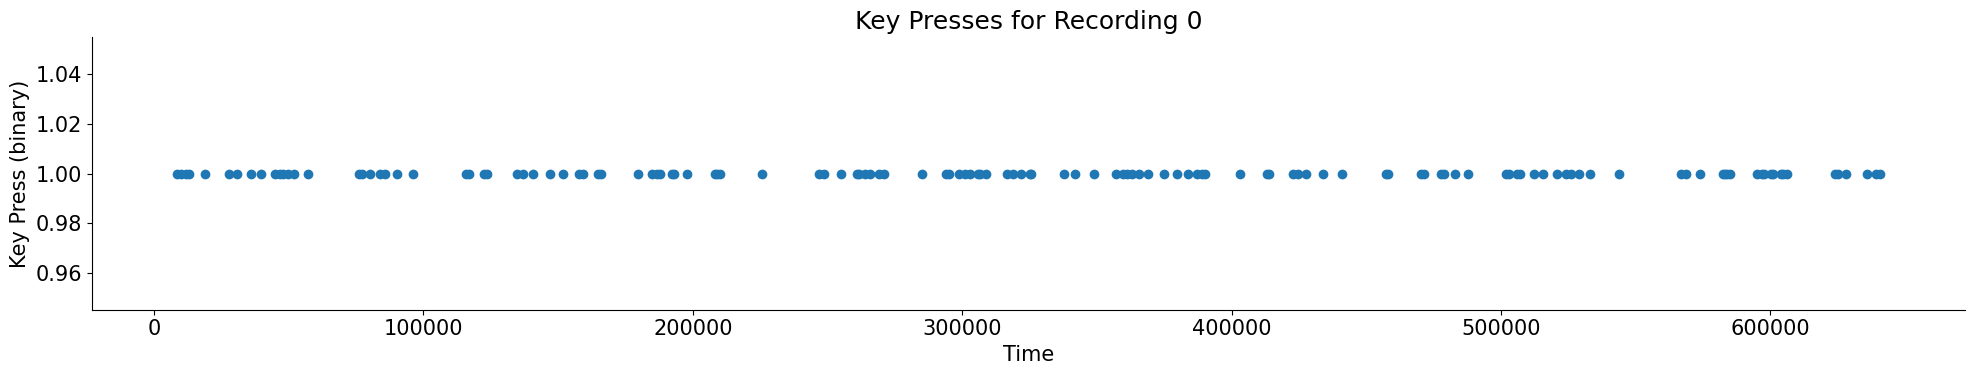

No key presses recorded for Recording 1
No key presses recorded for Recording 2


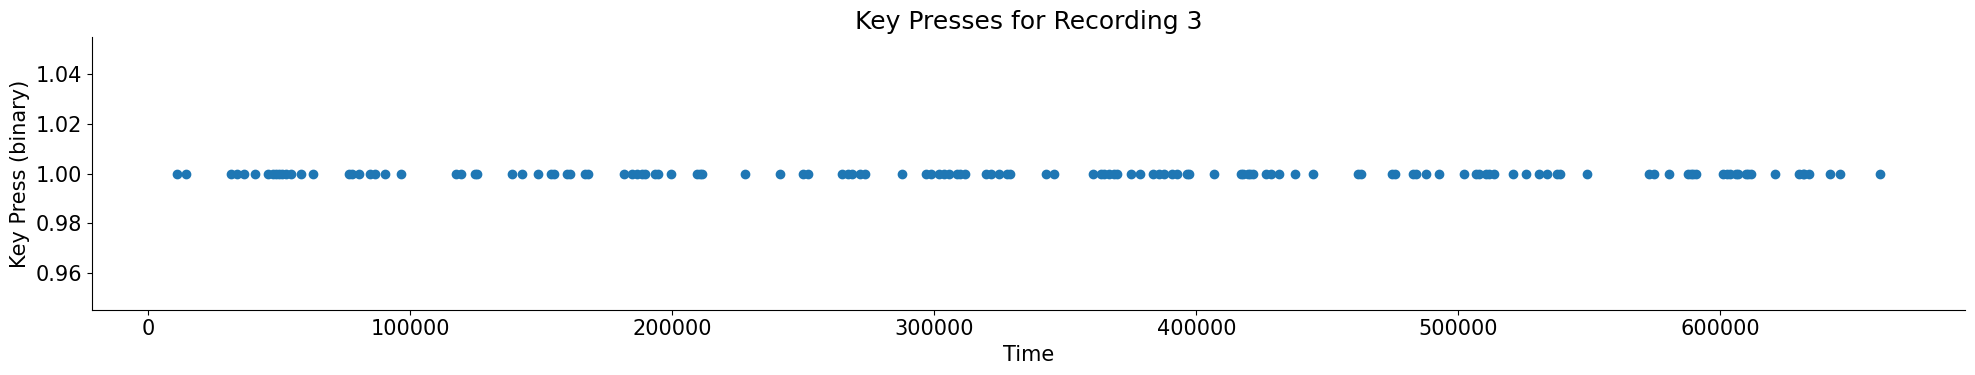

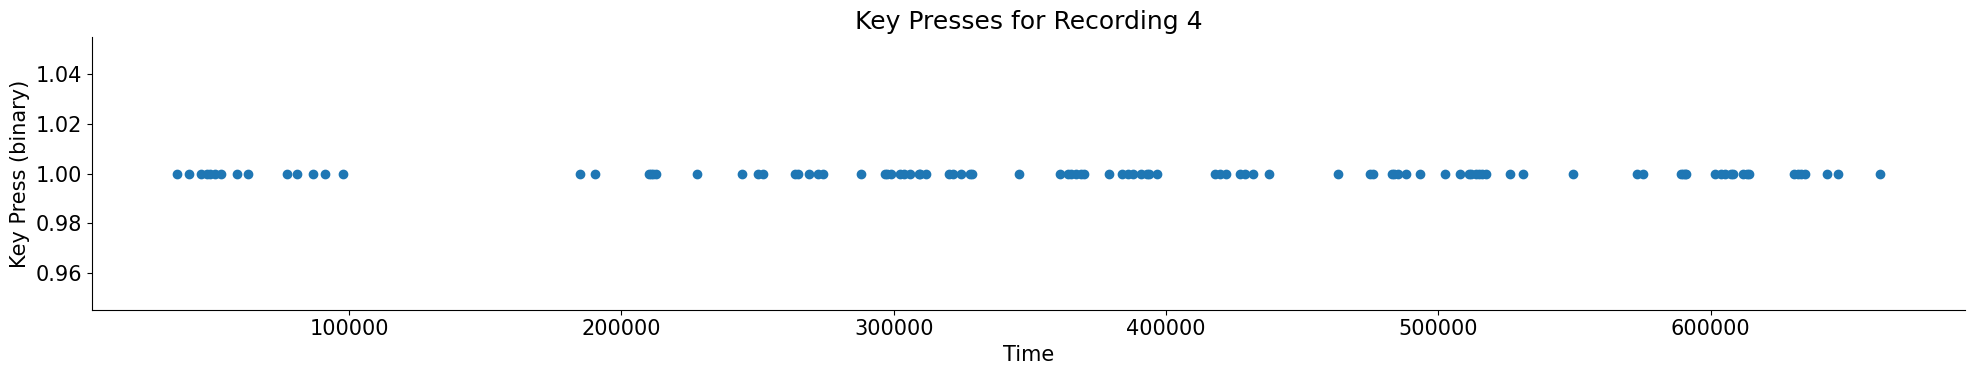

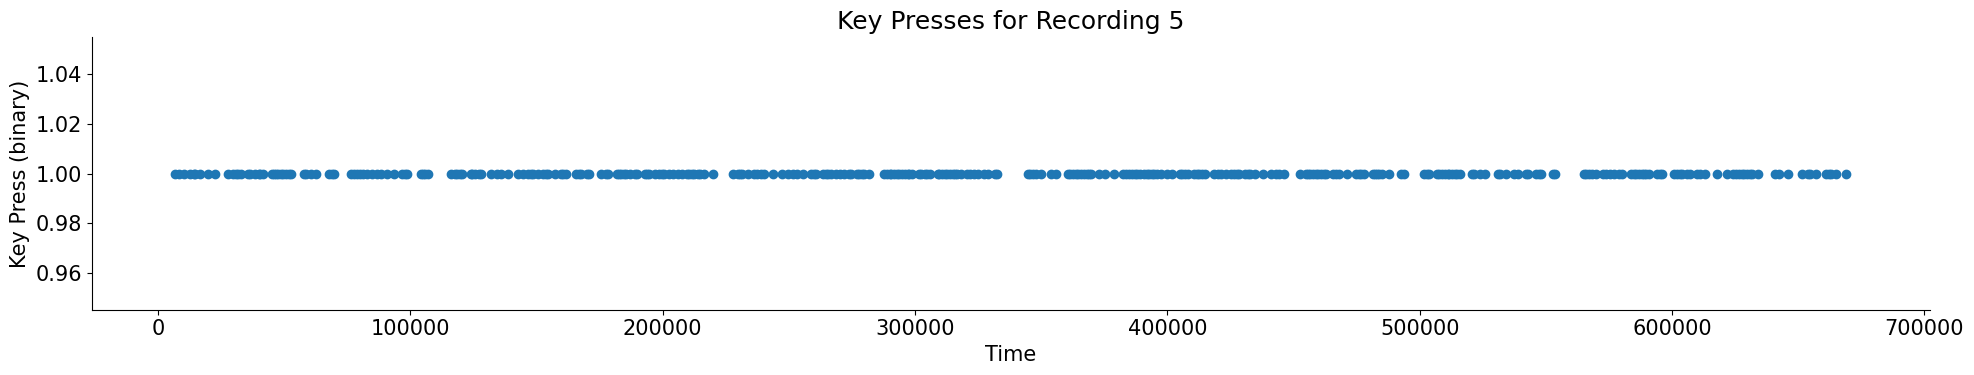

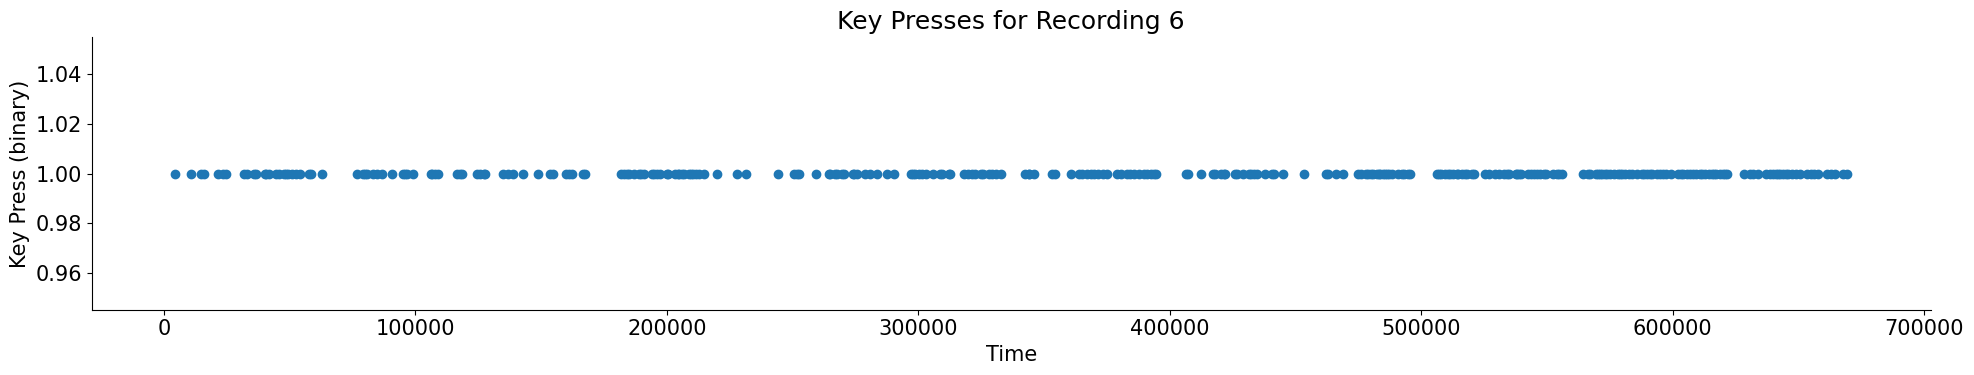

In [5]:
#Visualizing key_press data to see if it makes sense

def plot_key_presses(key_presses, recording_number):
    if len(key_presses) > 0:
        plt.figure()
        plt.plot(key_presses, np.ones_like(key_presses), 'o')
        plt.title(f'Key Presses for Recording {recording_number}')
        plt.xlabel('Time')
        plt.ylabel('Key Press (binary)')
        plt.show()
    else:
        print(f"No key presses recorded for Recording {recording_number}")

#Plot key presses for each recording
for i in range(len(alldat)):
    plot_key_presses(alldat[i][1].get('key_press', []), i)


In [6]:
#Checking frequency of key press to see how many faces where detected by each subject

for i in range(len(alldat)):
    key_presses = alldat[i][1].get('key_press', [])
    if len(key_presses) > 0:
        print(f"Recording {i}: {len(key_presses)} key presses")
    else:
        print(f"Recording {i}: No key presses")


Recording 0: 133 key presses
Recording 1: No key presses
Recording 2: No key presses
Recording 3: 141 key presses
Recording 4: 106 key presses
Recording 5: 354 key presses
Recording 6: 304 key presses


# Dataset info #

This is one of multiple ECoG datasets from Miller 2019, recorded in a clinical settings with a variety of tasks. We plan to curate a few more before NMA starts. Raw data here:

https://exhibits.stanford.edu/data/catalog/zk881ps0522

`alldat` contains 7 subjects each with two sessions `dat1` and `dat2`, and was originally used in these publications:

*Miller, Kai J., et al. "Face percept formation in human ventral temporal cortex." Journal of neurophysiology 118.5 (2017): 2614-2627.*

*Miller, Kai J., et al. "The physiology of perception in human temporal lobe is specialized for contextual novelty." Journal of neurophysiology 114.1 (2015): 256-263.*

*Miller, Kai J., et al. "Spontaneous decoding of the timing and content of human object perception from cortical surface recordings reveals complementary information in the event-related potential and broadband spectral change." PLoS computational biology 12.1 (2016): e1004660.*

*Miller, Kai J., et al. "The physiology of perception in human temporal lobe is specialized for contextual novelty." Journal of neurophysiology 114.1 (2015): 256-263.*

*Miller, Kai J., et al. "Spontaneous decoding of the timing and content of human object perception from cortical surface recordings reveals complementary information in the event-related potential and broadband spectral change." PLoS computational biology 12.1 (2016): e1004660.*

In this task, subjects in a clinical settings (with ECoG implants) are passively shown faces and house during the first experiment (`dat1`). Then in the second experiment in the same subjects (`dat2`), noise is added to face and houses images and the subject has to detect the faces by pressing a key. Two of the subjects don't have keypresses.

Sample rate is always 1000Hz, and the ECoG data has been notch-filtered at 60, 120, 180, 240 and 250Hz, followed by z-scoring across time and conversion to float16 to minimize size.

Experiment 1:
* `dat1['V']`: continuous voltage data (time by channels)
* `dat1['srate']`: acquisition rate (1000 Hz). All stimulus times are in units of this.  
* `dat1['t_on']`: time of stimulus onset in data samples
* `dat1['t_off']`: time of stimulus offset, always 400 samples after `t_on`
* `dat1['stim_id`]: identity of stimulus from 1-100, with 1-50 being houses and 51-100 being faces
* `dat1['locs`]: 3D electrode positions on the brain surface

Experiment 2:
* `dat2['V`]: continuous voltage data (time by channels)
* `dat2['srate']`: acquisition rate (1000 Hz). All stimulus times are in units of this.  
* `dat2['t_on']`: time of stimulus onset in data samples
* `dat2['t_off']`: time of stimulus offset, always 1000 samples after `t_on`, with no inter-stimulus interval
* `dat2['stim_id`]: identity of stimulus from 1-600 (not really useful, since we don't know which ones are the same house/face)
* `dat2['stim_cat']`: stimulus category (1 = house, 2 = face)
* `dat2['stim_noise']`: percent noise from 0 to 100
* `dat2['key_press']`: when the subject thought the image was a face
* `dat2['categories']`: categories legend (1 = house, 2 = face)
* `dat2['locs`]: 3D electrode positions on the brain surface


In [7]:
#Visualizing the electrodes on a brain illustration (Useful electrodes highlighted in red)

from nilearn import plotting
from nimare import utils

plt.figure(figsize=(8, 8))
locs = dat2['locs']
view = plotting.view_markers(utils.tal2mni(locs),
                             marker_labels=['%d'%k for k in np.arange(locs.shape[0])],
                             marker_color= ['blue' if i < 42 or i > 47 else 'red' for i in range(locs.shape[0])],
                             marker_size=5)
view

<Figure size 800x800 with 0 Axes>

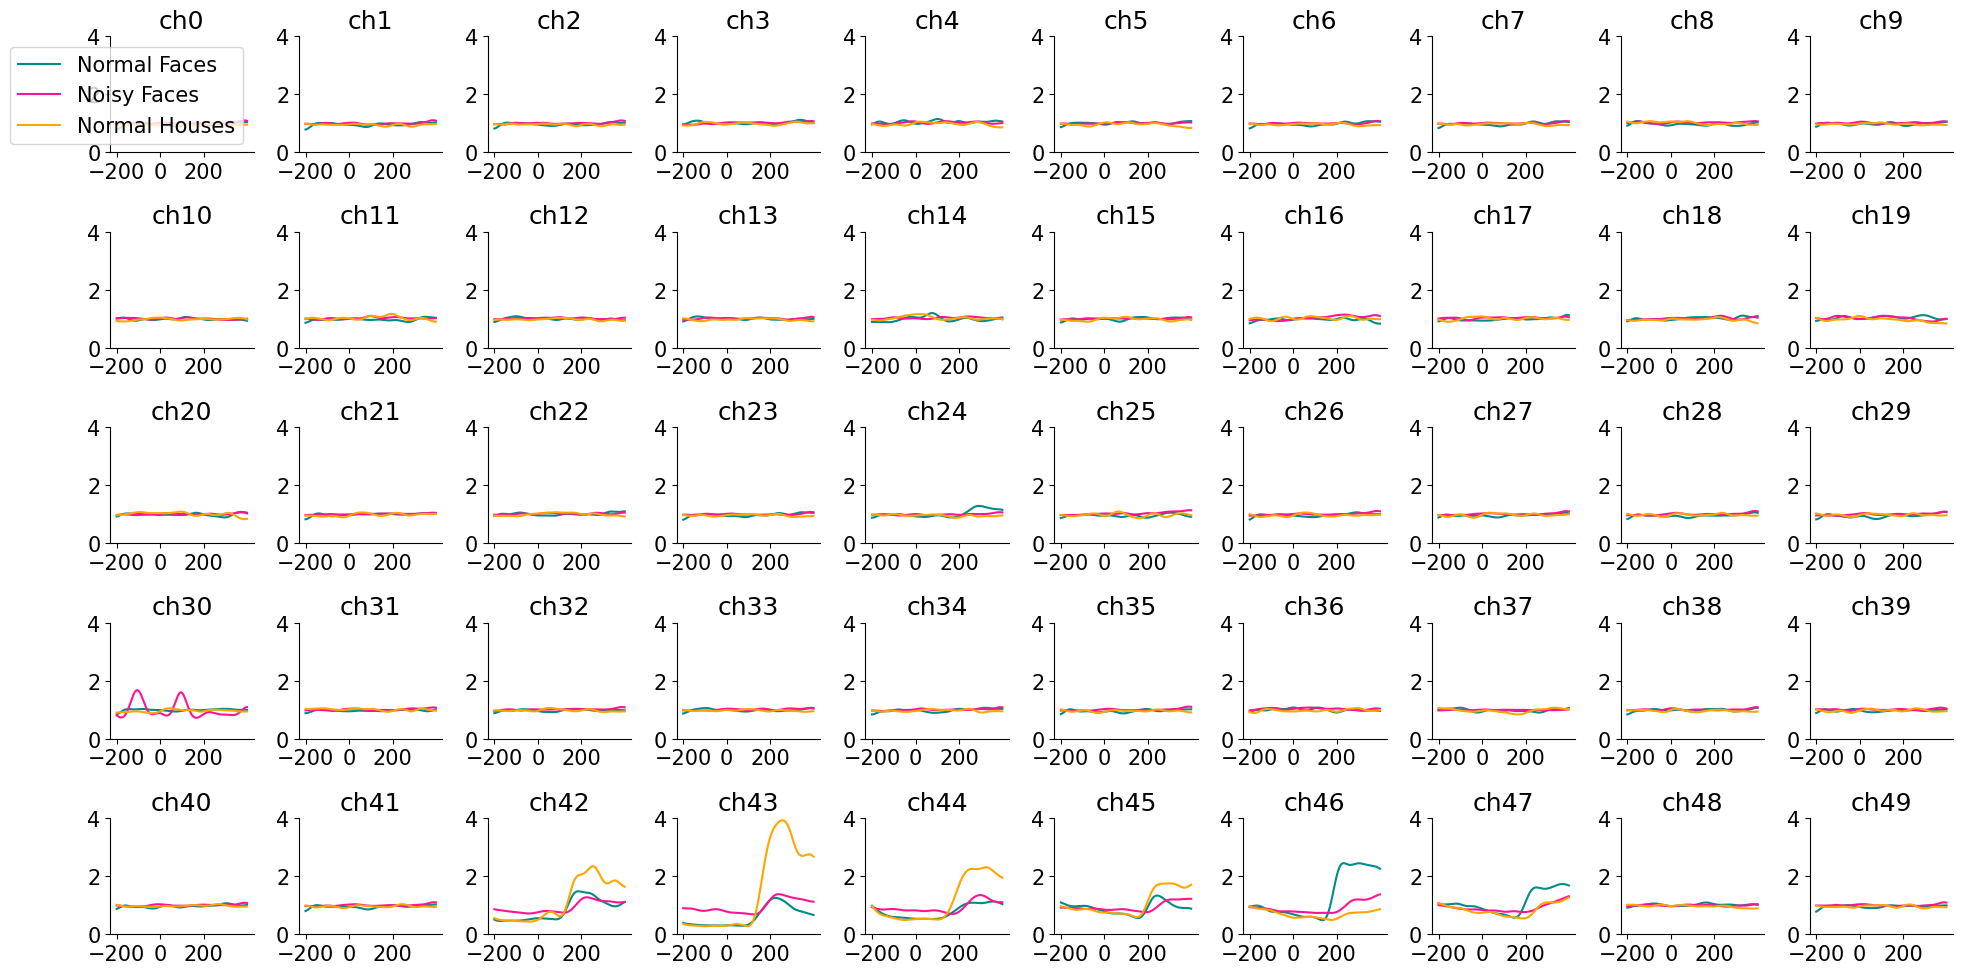

In [6]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# Define a function to process the data
def process_data(data):
    V = data['V'].astype('float32')
    
    # High-pass filter to remove frequencies below 50 Hz
    b, a = signal.butter(3, [50], btype='high', fs=1000)
    V = signal.filtfilt(b, a, V, axis=0)
    
    # Square the signal to get power
    V = np.abs(V)**2
    
    # Low-pass filter to remove frequencies above 10 Hz
    b, a = signal.butter(3, [10], btype='low', fs=1000)
    V = signal.filtfilt(b, a, V, axis=0)
    
    # Normalize the signal by its mean
    V = V / V.mean(0)
    
    return V

# Process both datasets
V1 = process_data(dat1)
V2 = process_data(dat2)

# Segment the signal into epochs centered around stimulus onset times
def get_epochs(data, V, stim_condition):
    nt, nchan = V.shape
    nstim = len(data['t_on'])
    
    # Time range for epochs
    trange = np.arange(-200, 400)
    ts = data['t_on'][:, np.newaxis] + trange
    V_epochs = np.reshape(V[ts, :], (nstim, 600, nchan))
    
    # Average the epochs for the specified stimuli condition
    V_stim = (V_epochs[stim_condition]).mean(0)
    
    return V_stim, trange

# Get face and house epochs for both datasets
V_face1, trange = get_epochs(dat1, V1, dat1['stim_id'] > 50)  # normal faces in dat1
V_face2, _ = get_epochs(dat2, V2, dat2['stim_id'] > 50)      # noisy faces in dat2
V_house1, _ = get_epochs(dat1, V1, dat1['stim_id'] <= 50)    # normal houses in dat1

# Plotting the results
plt.figure(figsize=(20, 10))
for j in range(50):
    ax = plt.subplot(5, 10, j+1)
    plt.plot(trange, V_face1[:, j], label='Normal Faces', color='darkcyan')
    plt.plot(trange, V_face2[:, j], label='Noisy Faces', color='deeppink')
    plt.plot(trange, V_house1[:, j], label='Normal Houses', color='orange')
    plt.title('ch%d' % j)
    plt.xticks([-200, 0, 200])
    plt.ylim([0, 4])
    if j == 0:
        plt.legend()

plt.show()


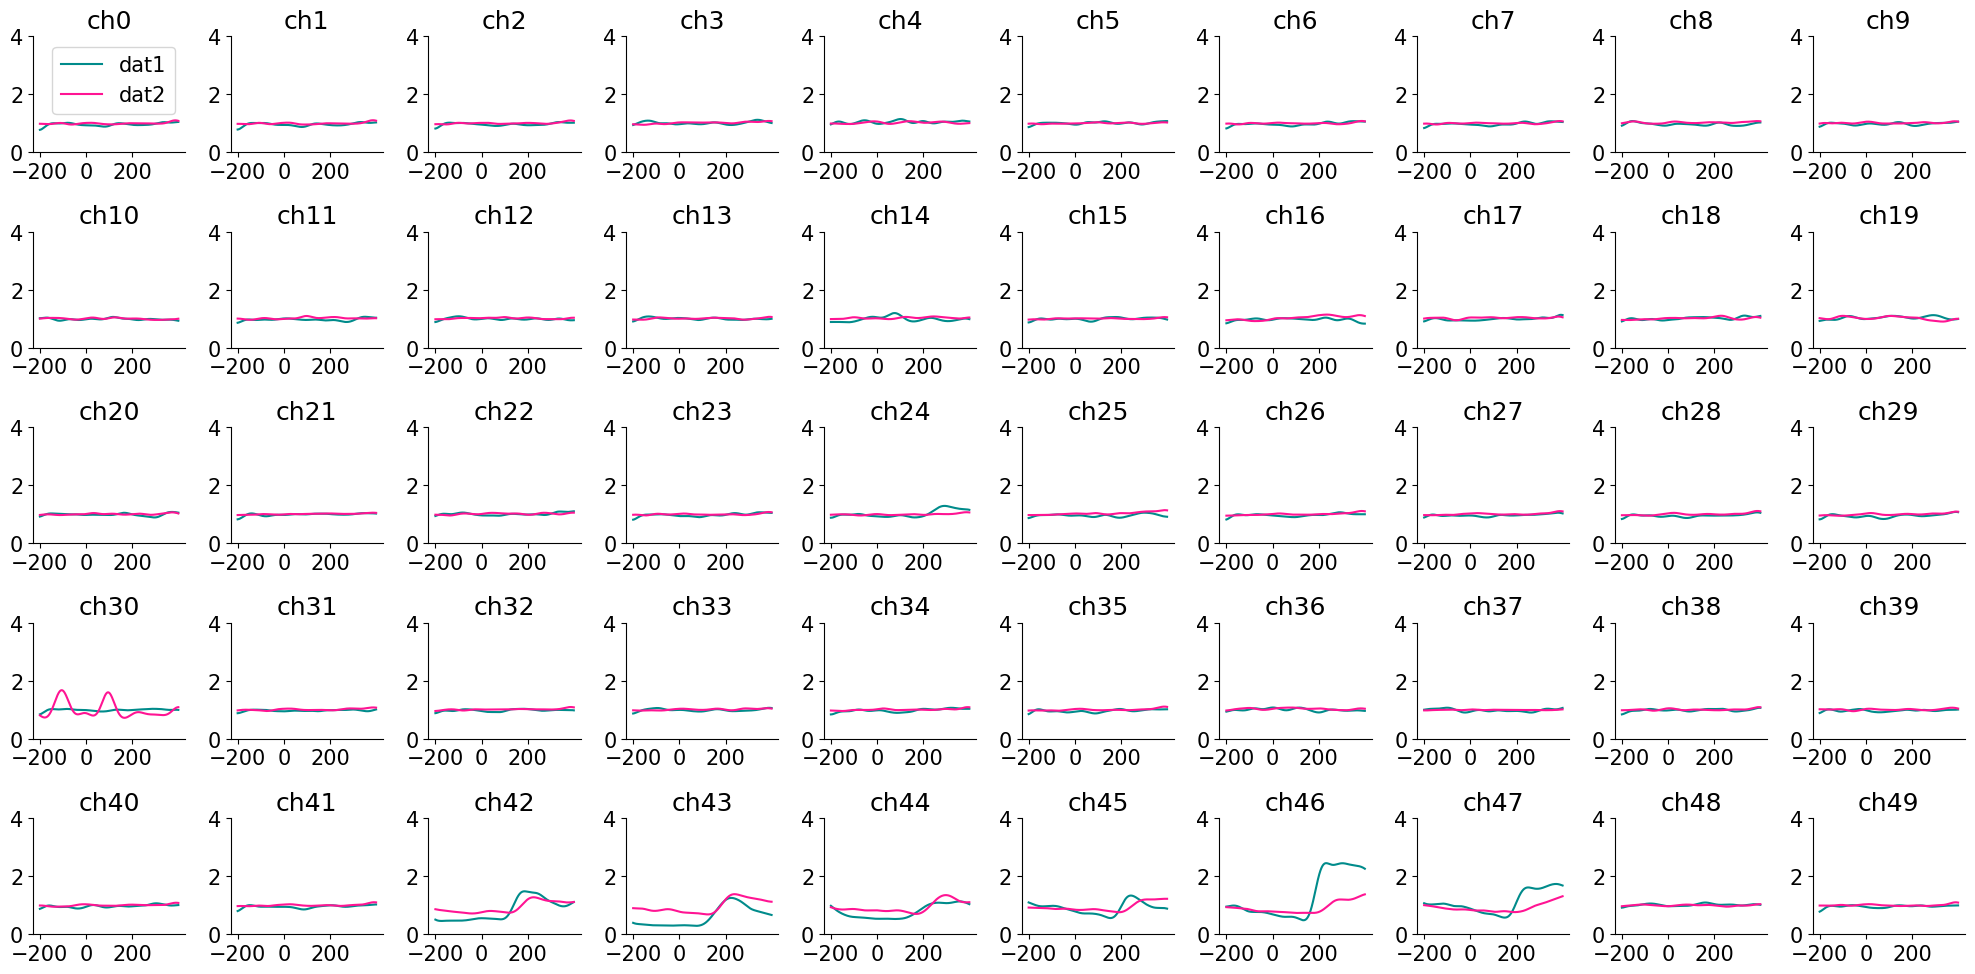

In [4]:
#Plotting noisy faces in dat2 (pink) vs normal faces in dat1 (blue)

from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting
from nimare import utils

# Define a function to process the data
def process_data(data):
    V = data['V'].astype('float32')
    
    # High-pass filter to remove frequencies below 50 Hz
    b, a = signal.butter(3, [50], btype='high', fs=1000)
    V = signal.filtfilt(b, a, V, axis=0)
    
    # Square the signal to get power
    V = np.abs(V)**2
    
    # Low-pass filter to remove frequencies above 10 Hz
    b, a = signal.butter(3, [10], btype='low', fs=1000)
    V = signal.filtfilt(b, a, V, axis=0)
    
    # Normalize the signal by its mean
    V = V/V.mean(0)
    
    return V

# Process both datasets
V1 = process_data(dat1)
V2 = process_data(dat2)

# Segment the signal into epochs centered around stimulus onset times
def get_face_epochs(data, V):
    nt, nchan = V.shape
    nstim = len(data['t_on'])
    
    # Time range for epochs
    trange = np.arange(-200, 400)
    ts = data['t_on'][:, np.newaxis] + trange
    V_epochs = np.reshape(V[ts, :], (nstim, 600, nchan))
    
    # Average the epochs for face stimuli
    V_face = (V_epochs[data['stim_id'] > 50]).mean(0)
    
    return V_face, trange

# Get face epochs for both datasets
V_face1, trange = get_face_epochs(dat1, V1)
V_face2, _ = get_face_epochs(dat2, V2)

#to get results
plt.figure(figsize=(20, 10))
for j in range(50):
    ax = plt.subplot(5, 10, j+1)
    plt.plot(trange, V_face1[:, j], label='dat1', color='darkcyan')
    plt.plot(trange, V_face2[:, j], label='dat2', color='deeppink')
    plt.title('ch%d' % j)
    plt.xticks([-200, 0, 200])
    plt.ylim([0, 4])
    if j == 0:
        plt.legend()

plt.show()


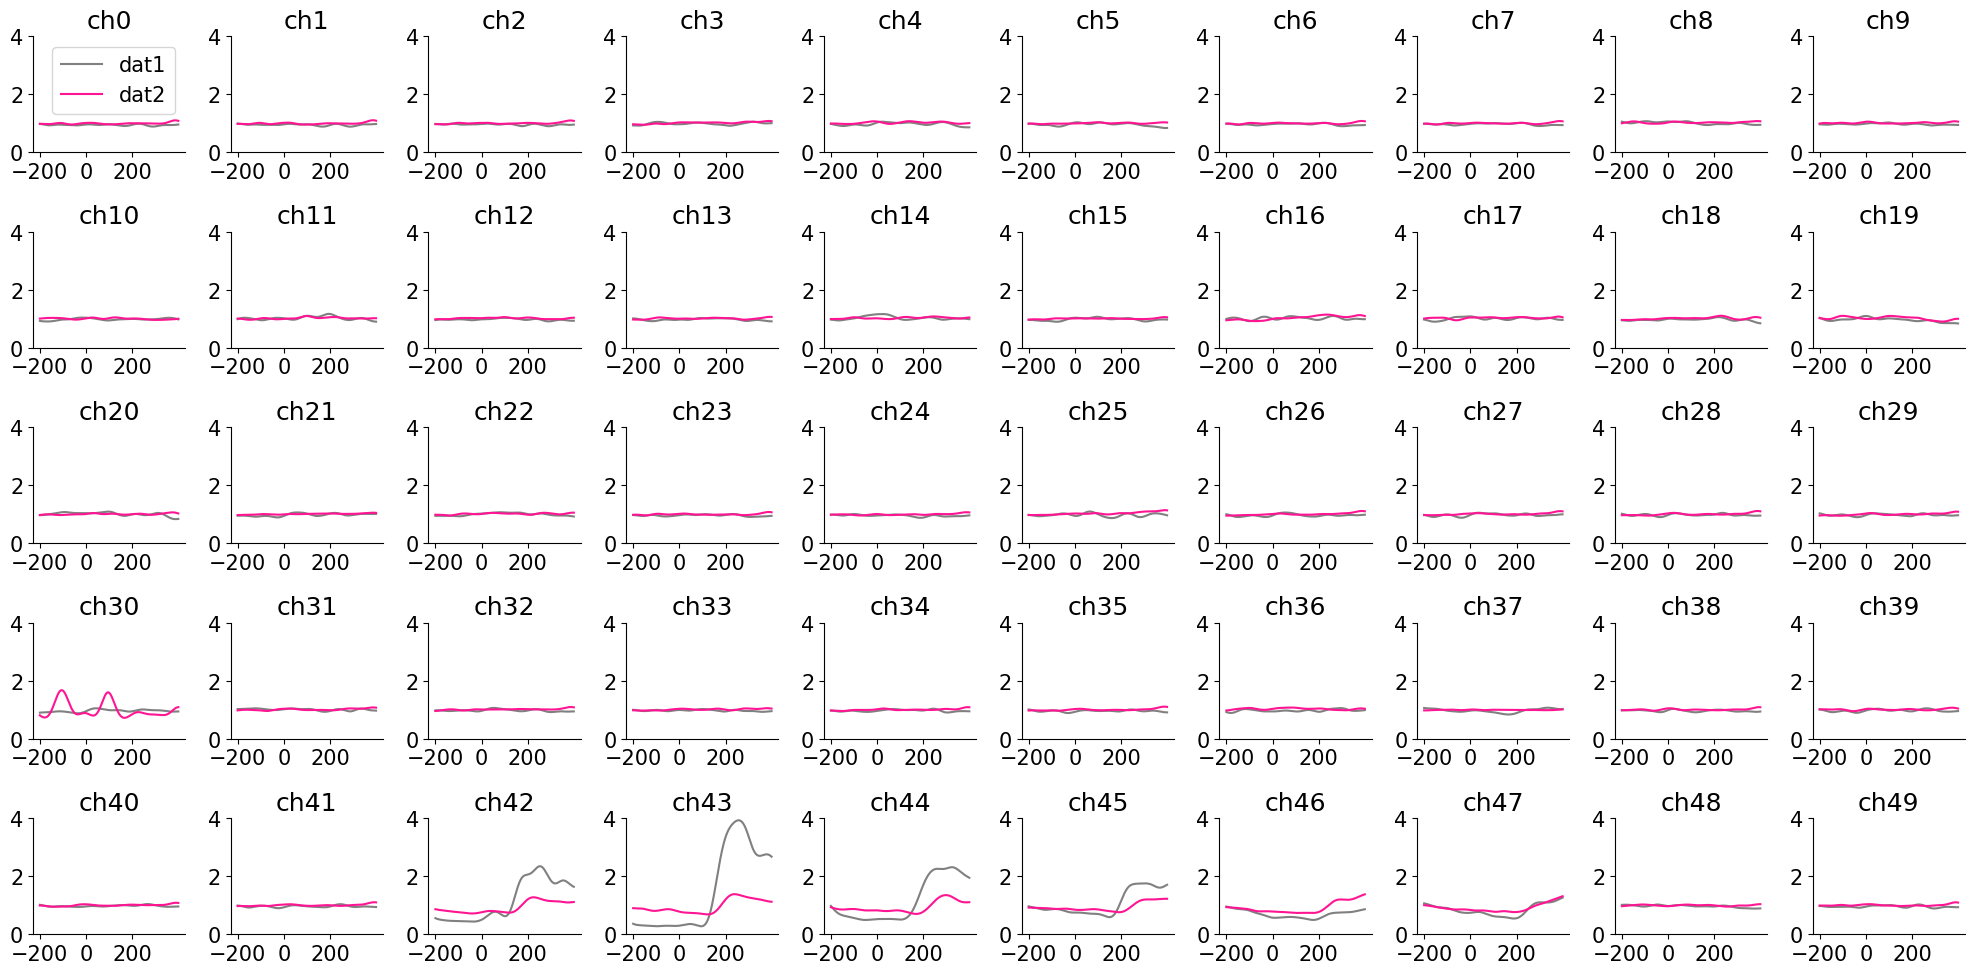

In [11]:
#Plotting noisy faces in dat2 (pink) vs noramal houses in dat1 (grey)

from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting
from nimare import utils

# Define a function to process the data
def process_data(data):
    V = data['V'].astype('float32')
    
    # High-pass filter to remove frequencies below 50 Hz
    b, a = signal.butter(3, [50], btype='high', fs=1000)
    V = signal.filtfilt(b, a, V, axis=0)
    
    # Square the signal to get power
    V = np.abs(V)**2
    
    # Low-pass filter to remove frequencies above 10 Hz
    b, a = signal.butter(3, [10], btype='low', fs=1000)
    V = signal.filtfilt(b, a, V, axis=0)
    
    # Normalize the signal by its mean
    V = V/V.mean(0)
    
    return V

# Process both datasets
V1 = process_data(dat1)
V2 = process_data(dat2)

# Segment the signal into epochs centered around stimulus onset times
def get_face_epochs(data, V):
    nt, nchan = V.shape
    nstim = len(data['t_on'])
    
    # Time range for epochs
    trange = np.arange(-200, 400)
    ts = data['t_on'][:, np.newaxis] + trange
    V_epochs = np.reshape(V[ts, :], (nstim, 600, nchan))
    
    # Average the epochs for face stimuli
    V_face = (V_epochs[data['stim_id'] > 50]).mean(0)
    
    return V_face, trange

def get_house_epochs(data, V):
    nt, nchan = V.shape
    nstim = len(data['t_on'])
    
    # Time range for epochs
    trange = np.arange(-200, 400)
    ts = data['t_on'][:, np.newaxis] + trange
    V_epochs = np.reshape(V[ts, :], (nstim, 600, nchan))
    
    # Average the epochs for face stimuli
    V_face = (V_epochs[data['stim_id'] < 51]).mean(0)
    
    return V_face, trange
# Get face epochs for both datasets
V_house1, trange = get_house_epochs(dat1, V1)
V_face2, _ = get_face_epochs(dat2, V2)

# Plot the results
plt.figure(figsize=(20, 10))
for j in range(50):
    ax = plt.subplot(5, 10, j+1)
    plt.plot(trange, V_house1[:, j], label='dat1', color='grey')
    plt.plot(trange, V_face2[:, j], label='dat2', color='deeppink')
    plt.title('ch%d' % j)
    plt.xticks([-200, 0, 200])
    plt.ylim([0, 4])
    if j == 0:
        plt.legend()

plt.show()
